In [6]:
import sys
import os
import matplotlib.pyplot as plt
import torch
from core.quantization import quantize_tensor, EasyQuantConfig

# Add the parent directory to the path
sys.path.append(os.path.abspath(".."))
print(sys.path)

['/opt/anaconda3/lib/python311.zip', '/opt/anaconda3/lib/python3.11', '/opt/anaconda3/lib/python3.11/lib-dynload', '', '/Users/deyucao/Library/Caches/pypoetry/virtualenvs/quantization-ubRKDRCl-py3.11/lib/python3.11/site-packages', '/Users/deyucao/Quantization', '/var/folders/rx/ym13fcm14d568j0djggdjsrh0000gn/T/tmpk1ujvrsk', '/Users/deyucao/Quantization']


In [3]:
original_vector = [3.2, -1.4, 2.5, -0.9, 1.8, -3.7, 0.0, 4.0, 2.2, -1.3]
original_tensor = torch.tensor(original_vector)

In [5]:
# quantize the vector using EasyQuant
config = EasyQuantConfig(learning_rate=1e-3, num_epochs=200)
num_bits = 3

quantized_vector, q_range_history, reconstruction_error_history = quantize_tensor(
    x=original_tensor,
    num_bits=num_bits,
    quantization_algorithm="EasyQuant",
    verbose=True,
    **config
)

Optimizing quantization range using EasyQuant algorithm
Learning rate: 0.001
Number of epochs: 200
Initial quantization range: 1.100000023841858
Epoch 1: Quantization range = 1.0989999771118164
Epoch 2: Quantization range = 1.0980031490325928
Epoch 3: Quantization range = 1.097011923789978
Epoch 4: Quantization range = 1.096029281616211
Epoch 5: Quantization range = 1.0950584411621094
Epoch 6: Quantization range = 1.094103217124939
Epoch 7: Quantization range = 1.0931679010391235
Epoch 8: Quantization range = 1.0922572612762451
Epoch 9: Quantization range = 1.0913763046264648
Epoch 10: Quantization range = 1.0905307531356812
Epoch 11: Quantization range = 1.089726448059082
Epoch 12: Quantization range = 1.088969349861145
Epoch 13: Quantization range = 1.0882654190063477
Epoch 14: Quantization range = 1.0876202583312988
Epoch 15: Quantization range = 1.0870388746261597
Epoch 16: Quantization range = 1.0865254402160645
Epoch 17: Quantization range = 1.0860830545425415
Epoch 18: Quantizat

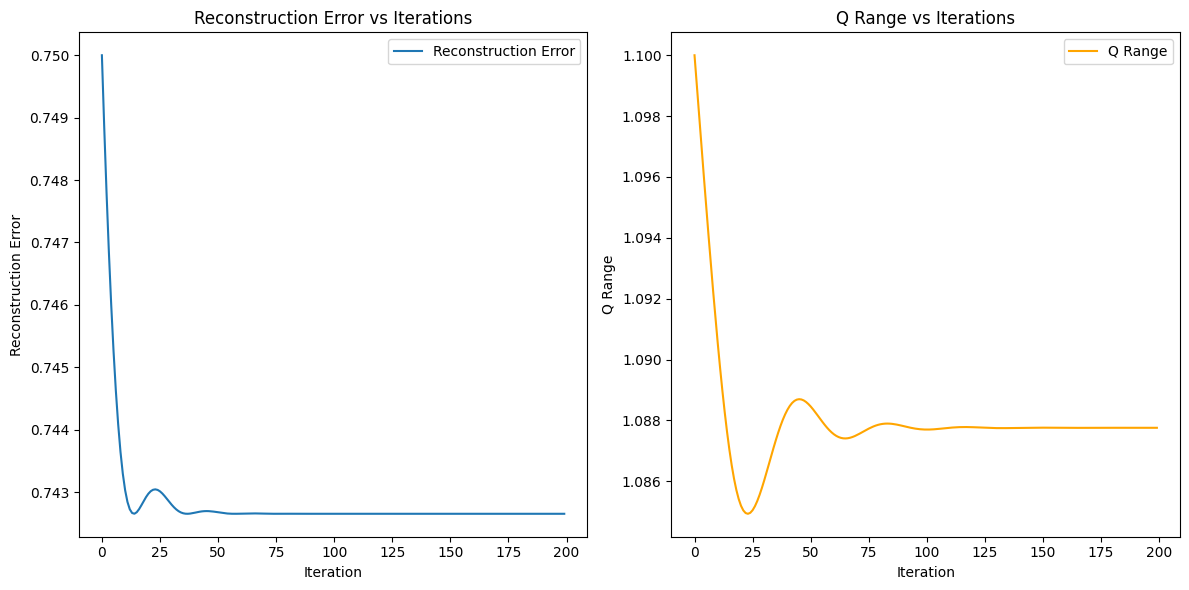

In [7]:
# Plot reconstruction error
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(reconstruction_error_history, label='Reconstruction Error')
plt.xlabel('Iteration')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs Iterations')
plt.legend()

# Plot q_range
plt.subplot(1, 2, 2)
plt.plot(q_range_history, label='Q Range', color='orange')
plt.xlabel('Iteration')
plt.ylabel('Q Range')
plt.title('Q Range vs Iterations')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
print(f"Original Vector: {original_vector}")
print(f"Quantized Vector: {quantized_vector}")

Original Vector: [3.2, -1.4, 2.5, -0.9, 1.8, -3.7, 0.0, 4.0, 2.2, -1.3]
Quantized Vector: tensor([ 3.2633, -1.0878,  2.1755, -1.0878,  2.1755, -3.2633,  0.0000,  4.3510,
         2.1755, -1.0878])


In [9]:
print(torch.sum((original_tensor - quantized_vector) ** 2))

tensor(0.7427)
